In [1]:
import matplotlib.pyplot as plt
import numpy as np

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from models.cem_ibm_model import AEADEN 

In [2]:
dataset = MNIST(batch_size=64)
# dataset = FashionMNIST()

# Training the classifier

In [3]:
cnn = CNN(device='cpu')

train_cnn(cnn, dataset, iterations=50, lr=0.01, device='cpu', save_fn='mnist-cnn-rescaled', load_path="models/saved_models/mnist-cnn.h5")

In [4]:
images, _ = dataset.get_batch()

output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


D:\Programmeren\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [5]:
# Train or load autoencoder
cae = CAE()

train_ae(cae, dataset, iterations=2, save_fn="mnist-cae", load_path="./models/saved_models/mnist-cae-no-rs.h5")

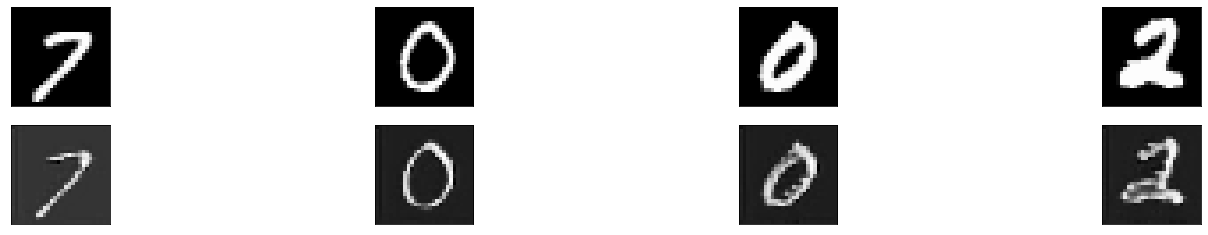

In [6]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = cae(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [7]:
CEM = AEADEN(model=cnn, AE=cae, max_iterations=1000, n_searches=9, kappa=10, gamma=100)

tensor(1)


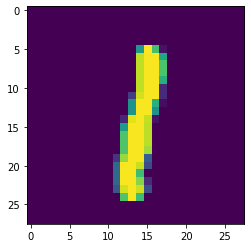

In [8]:
# obtain one sample
image, label = dataset.get_sample()

plt.imshow(image.squeeze())
print(label)

In [9]:
# find pertinent negatives
CEM.compute_CEM(image)

search:0 iteration:20 lr:0.10 c value:0.10 loss: 994.81 delta sum:25.19 optimum:False y grad:-23093.060
search:0 iteration:40 lr:0.10 c value:0.10 loss: 993.88 delta sum:31.50 optimum:False y grad:-7610.878
search:0 iteration:60 lr:0.10 c value:0.10 loss: 997.15 delta sum:47.49 optimum:False y grad:-22650.726
search:0 iteration:80 lr:0.10 c value:0.10 loss: 995.11 delta sum:43.42 optimum:False y grad:-5574.372
search:0 iteration:100 lr:0.09 c value:0.10 loss: 996.53 delta sum:58.16 optimum:False y grad:-9871.067
search:0 iteration:120 lr:0.09 c value:0.10 loss: 996.35 delta sum:44.11 optimum:False y grad:-216.879
search:0 iteration:140 lr:0.09 c value:0.10 loss: 995.78 delta sum:54.89 optimum:False y grad:-3941.289
search:0 iteration:160 lr:0.09 c value:0.10 loss: 994.03 delta sum:51.29 optimum:False y grad:-15609.650
search:0 iteration:180 lr:0.09 c value:0.10 loss: 996.24 delta sum:41.87 optimum:False y grad:-12396.888
search:0 iteration:200 lr:0.09 c value:0.10 loss: 994.18 delta su

search:1 iteration:600 lr:0.06 c value:1.00 loss: 9955.88 delta sum:58.89 optimum:False y grad:3951.254
search:1 iteration:620 lr:0.06 c value:1.00 loss: 9964.95 delta sum:53.90 optimum:False y grad:-11929.206
search:1 iteration:640 lr:0.06 c value:1.00 loss: 9962.67 delta sum:54.85 optimum:False y grad:-8509.800
search:1 iteration:660 lr:0.06 c value:1.00 loss: 9945.08 delta sum:68.22 optimum:False y grad:-4718.837
search:1 iteration:680 lr:0.06 c value:1.00 loss: 9967.96 delta sum:56.58 optimum:False y grad:-14708.228
search:1 iteration:700 lr:0.05 c value:1.00 loss: 9955.36 delta sum:63.31 optimum:False y grad:-3209.608
search:1 iteration:720 lr:0.05 c value:1.00 loss: 9972.11 delta sum:52.86 optimum:False y grad:-6824.837
search:1 iteration:740 lr:0.05 c value:1.00 loss: 9967.67 delta sum:39.01 optimum:False y grad:-15813.772
search:1 iteration:760 lr:0.05 c value:1.00 loss: 9952.49 delta sum:51.84 optimum:False y grad:-17515.019
search:1 iteration:780 lr:0.05 c value:1.00 loss: 99

KeyboardInterrupt: 

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin'

# from torchviz import make_dot
# make_dot(CEM.loss).view()

In [ ]:
print(CEM.best_delta - image.view(28*28))

In [ ]:
plt.imshow(image.squeeze())

In [ ]:
plt.imshow(CEM.best_delta.view(28,28) - image.squeeze())

In [ ]:
# classification after
np.argmax(cnn(CEM.best_delta.view(1,28,28)).detach())

In [ ]:
# classification before
np.argmax(cnn(image.squeeze(-1)).detach())

In [ ]:
print(CEM.best_loss)

In [ ]:
print(CEM.best_pert_loss)

In [ ]:
print(CEM.best_c)